In [7]:
# This is just something to start with. If there's anything you wish to change, feel free to do so.
# If there's anything that needs clarifying please indicate it as a comment with #### prefixed.

import numpy as np
import time
import sys
import matplotlib.pyplot as plt


In [8]:
def calc(x, y):
    sqrt = np.sqrt(x)
    sqrd = y**2
    return(sqrt*sqrd)

In [9]:
np.sqrt(5)*6**2

80.49844718999243

In [10]:
calc(5,6)

80.49844718999243

In [11]:
p = 1 + np.random.randint(1000, size = 410) # job processing times

In [12]:
p

array([471, 289, 977, 573, 356, 281, 902, 860, 469, 285, 401, 116, 837,
       688,  39, 914, 808, 381, 481, 468, 720,  90, 267, 813, 446, 435,
       531, 258, 916, 372, 615, 587, 689, 368, 411, 271,  64, 346, 613,
       548, 242, 117, 992, 663, 421, 658, 267, 102, 210, 837, 567, 799,
       340, 503, 211,  98, 520, 784, 717, 650, 805,  20, 358,  30, 167,
       878, 752, 935, 497, 808, 171, 245, 791, 776, 447, 435, 292, 352,
       586, 341, 680,  39, 409, 278, 553, 939, 499, 607, 382, 243, 711,
       148, 809, 646, 692,   6, 756, 362, 812, 394, 453, 119, 812,  77,
       130, 814, 910, 612, 515, 235,  70,  14, 719, 888, 380, 162, 210,
       779, 648,  90,  46, 390, 279, 765, 601, 775, 986, 614, 164, 339,
       663,  34, 652, 695,  57,  23, 549, 680, 339, 277, 613,  11, 997,
        16, 470, 889, 130,  48, 540, 593, 228, 736, 682, 808, 690, 864,
       171, 950, 231, 728, 221, 476, 391, 362, 643, 460, 129, 670,  87,
       751, 939, 621, 714, 972,  80, 519, 590,  24, 732, 299, 10

In [13]:
np.random.randint(1000, size = 410)

array([756, 431, 749, 594, 458, 509, 897, 951,  73, 943, 806,  48, 952,
       666, 909, 268, 570, 836, 361, 585, 595,  20, 325,  61, 555, 179,
       835, 510, 229, 759, 132, 309, 145, 284, 910, 226, 558, 143, 877,
       468, 939, 825, 234, 631, 684, 361,  50, 479, 646,  76, 622, 549,
       465, 722, 677, 207, 516, 232,  36, 863,  77, 167, 854, 183, 380,
       348, 727,  86, 454, 963, 893, 260, 639, 972, 106, 471, 383, 609,
        72, 612, 962, 699, 921, 496, 248, 384, 160, 535, 204,  75, 373,
       339, 354, 402, 678, 859, 822, 672, 737,  64, 823, 509, 492, 574,
       363, 858, 360,  85, 374, 543, 834, 491, 709, 294, 595, 294, 977,
       796, 943, 109, 814, 220,  16, 316, 576, 626, 319, 753, 162, 335,
       579,  53, 970, 642, 431, 785, 568, 537, 196, 361, 368, 677, 155,
       594, 697, 684, 616, 846, 474,  79, 144, 475, 115, 582, 994, 319,
       948, 840, 406, 611, 828,  99, 594, 171,  80, 914, 730,  77,  53,
        94, 436,  41, 318, 167, 255, 282, 334, 285, 348,  33, 44

In [14]:
# note: instances should be read from text file instead of as defined below

allowableTime = 3 # time allowed in seconds
p = 1 + np.random.randint(1000, size = 410) # job processing times
p = np.append(p, 1 + np.random.randint(3001, size = 71))
p = np.append(p, 1 + 1 + np.random.negative_binomial(n = 100, p = 0.5, size = 100))
m = 243 # number of machines

# makespan instance from Charl's lecture notes (part 3)
# allowableTime = 1
# m = 4
# p = [3, 2, 4, 1, 3, 3, 6]

In [15]:
# note: instances should be read from text file instead of as defined below

allowableTime = 3 # time allowed in seconds
p = 1 + np.random.randint(1000, size = 410) # job processing times
p = np.append(p, 1 + np.random.randint(3001, size = 71))
p = np.append(p, 1 + 1 + np.random.negative_binomial(n = 100, p = 0.5, size = 100))
m = 243 # number of machines

# makespan instance from Charl's lecture notes (part 3)
# allowableTime = 1
# m = 4
# p = [3, 2, 4, 1, 3, 3, 6]

In [17]:
### creating an example txt instance
inst = np.append(p,m)
with open("instance.txt", "w") as f:
    print(inst, file = f)

Given an instance will be of the form $(p_1, p_2, \cdots , p_n, m)$ we need to read the txt file in this way.  We can then chop it up for the agent to manipulate

In [18]:
import csv

In [19]:
def import_inst(filename):
    '''
    imports a text file instance, converts it to an array and then allocates it to p and m, 
    where p are the jobs and m is the number of machines
    '''
    lst = [line.rstrip('\n') for line in open(filename)]
    inst = []
    for j in range(0,len(lst)):
        inst = np.append(inst,[int(i) for i in str.split(lst[j])])
    global p, m
    m =  int(inst[-1])
    p = inst[:-1].astype(np.int)


In [20]:
import_inst('instance.txt')

ValueError: invalid literal for int() with base 10: '['

In [157]:
m

243

In [60]:
mr_list = [line.rstrip('\n') for line in open("instance.txt")]

In [100]:
for j in range(0,len(mr_list)):
    inst = np.append(inst,[int(i) for i in str.split(mr_list[j])])

In [137]:
inst

array([  94,  115,   90,   86,  103,   87,   75,  243,  798,  820,  904,
        113,  452,  461,  573,  413,  436,  735,  987,  235,  742,  474,
        100,  230,  652,  896,  414,  227,   12,  836,  271,  359,  593,
        144,  901,  818,   74,  639,  241,  263,  122,  689,  850,  769,
        910,  209,  425,  336,  573,  392,  363,  778,  477,  954,  882,
        668,   40,  163,  138,  975,  214,  436,   10,  469,  171,  518,
        415,  350,  153,  312,  863,  257,  767,  981,  228,  597,  359,
        725,  552,  584,  704,  168,  404,  947,  602,   96,  479,  859,
        825,  669,  703,  316,  967,  767,   27,  399,  526,  467,  912,
        710,  657,  873,  845,  591,  602,  843,  429,  949,   48,  944,
         67,  828,  410,   92,  982,  679,  762,  160,   22,  506,  971,
        967,  314,  184,  453,  593,  623,  870,  565,  130,  941,  726,
        278,  249,  287,  472,  500,  434,  711,  973,  419,  576,  321,
        397,  113,  695,  845,  373,  754,  397,  7

In [4]:
# this defines an 'agent' object which would implement a heuristic to solve the makespan problem
# note: for neatness, this should later be moved to its own file
class agent:
    def __init__(self):
        self.machine = [] # list of length len(p), where self.machine[job] = machine assigned to job
        self.workload = np.array([]) # np.array of length m, where self.workload[machine] = sum of processing times of jobs assigned to machine
        self.cost = None # cost of current feasible solution
        self.costTrajectory = [] # list of cost of feasible solution found in each step
    # generates a random initial feasible solution
    def generateInitialSolution(self):
        self.machine = []
        self.workload = np.zeros(m)
        for job in range(len(p)):
            machine = np.random.randint(m) # randomly select machine to assign job to
            self.machine.append(machine) # assign 'job' to 'machine'
            self.workload[machine] += p[job] # add job processing time to workload of 'machine'
        self.cost = np.max(self.workload)
    # when the workload of a machine is to be changed, add 'update' to the workload and efficiently update self.cost 
    def updateWorkload(self, machine, update):
        initialWorkload = self.workload[machine]
        newWorkload = initialWorkload + update
        self.workload[machine] = newWorkload
        if newWorkload > self.cost:
            self.cost = newWorkload
        elif initialWorkload == self.cost and newWorkload < self.cost:
            self.cost = np.max(self.workload)
        else:
            pass
    # switch assigned machine of 'job' to 'toMachine'
    def switchMachine(self, job, toMachine):
        fromMachine = self.machine[job] # initial machine of job
        self.updateWorkload(fromMachine, -p[job])
        self.machine[job] = toMachine
        self.updateWorkload(toMachine, p[job])
    # Note that this is just a (random) local search implementation, not greedy local search as question 1 asks
    def localSearchIteration(self, k):
        costAlpha = self.cost
        jobs, machines = np.random.choice(len(p), size = k), np.random.choice(m, size = k) # randomly select jobs and machines to assign these jobs to
        initialMachines = [self.machine[i] for i in jobs]
        for (job, machine) in zip(jobs, machines):
            self.switchMachine(job, machine)
        costBeta = self.cost
        # if new feasible solution is worse then go back, otherwise stay
        if costBeta > costAlpha:
            for (job, machine) in zip(jobs, initialMachines):
                self.switchMachine(job, machine)
            self.costTrajectory.append(costAlpha)
        else:
            self.costTrajectory.append(costBeta)
    # k defines the size of the neighbourhood and totalTime determines how much time the function is allowed to run
    def localSearch(self, k, totalTime):
        initialTime = time.time()
        # note: algorithm may run later than cut-off if iteration takes too long!
        while time.time() - initialTime < totalTime:
            self.localSearchIteration(k)

In [8]:
# ## testing cells to familiarise with class methods

# Test = agent()


In [12]:
# Test.generateInitialSolution()
# Test.updateWorkload(5, 6)

In [27]:
# inst_1 = [4,5,6,8,6,5,8,6,3,2,4,5,6,8,9]
# m = inst_1[-1]
# p = inst_1[:-1]


Text(0, 0.5, 'cost of feasible solution')

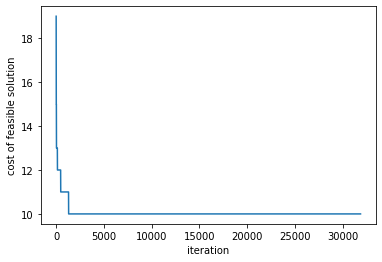

In [28]:
A = agent()
A.generateInitialSolution()
A.localSearch(4, allowableTime)

plt.plot(A.costTrajectory)
plt.xlabel("iteration")
plt.ylabel("cost of feasible solution")

In [10]:
# determines whether the solution found by A is indeed feasible, input: A is an 'agent' object
def verifyFeasibleSolution(A):
    # check that each job is assigned to exactly one machine
    assert(len(A.machine) == len(p))
    # check that there are at most m machines that have jobs assigned to them
    assert(max(A.machine) <= m)

    # check that the workloads are as indicated in A.workload
    workload = np.zeros(m)
    for job in range(len(p)):
        workload[A.machine[job]] += p[job]
    for i in range(m):
        assert(workload[i] == A.workload[i])

    # check that the maximum of the workloads (i.e. the cost) is as indicated in A.cost
    assert(np.isclose(A.cost, np.max(A.workload)))

verifyFeasibleSolution(A)

None
